Step 1: Data loading


In [1]:
import pandas as pd

# Load the file name
df = pd.read_excel('Test2_dataset.xlsx')

# view the first few rows
print(df.head())


             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

In [2]:
# view the column's data types
print(df.dtypes)

Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object


Step 2: check for missing data values

In [3]:
# print how many cells have missing data and which columns they are in

# Count missing values in each column
missing_values = df.isnull().sum()

# Total missing values in the DataFrame
total_missing = missing_values.sum()

print("Missing values in each column:")
print(missing_values)

print("\nTotal missing values:", total_missing)

Missing values in each column:
Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
dtype: int64

Total missing values: 1258


Note: Nickel dispresion is widely missing values, so don't analyze nickel dispersion when analyzing data, even through I'm filling it with the median of the

In [4]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Iterate through each column
for col in df.columns:
    # Check if the column is numeric
    if df[col].dtype.name.startswith('float') or df[col].dtype.name.startswith('int'):
        # Fill missing values with the median
        df[col] = df[col].fillna(df[col].median())
    else:
        # Fill missing values with the mode
        df[col] = df[col].fillna(df[col].mode().iloc[0])  # Handle multiple modes by selecting the first

        # Or, if you prefer to delete missing values for non-numeric columns:
        # df[col] = df[col].dropna()

# Print the cleaned DataFrame
print(df)

                Catalyst  Ratio of CH4 in Feed  Reaction Temperature  \
0            Ni−SiO2‑550                  0.15                   650   
1            Ni−SiO2‑750                  0.15                   650   
2      Ni/Sn0.2−SiO2‑550                  0.15                   650   
3      Ni/Sn0.2−SiO2‑750                  0.15                   650   
4     Ni/Sn0.05−SiO2‑550                  0.15                   650   
...                  ...                   ...                   ...   
1709              Ni-IMP                  0.50                   750   
1710            Ni/CZ100                  0.50                   700   
1711             Ni/CZ75                  0.50                   700   
1712             Ni/CZ44                  0.50                   700   
1713             Ni/CZ28                  0.50                   700   

      Ni Loading  Reaction Time  Pore Size  Pore Volume  Surface Area  \
0          10.00            0.5        4.7         0.58       

Step 3: Handling Outliers

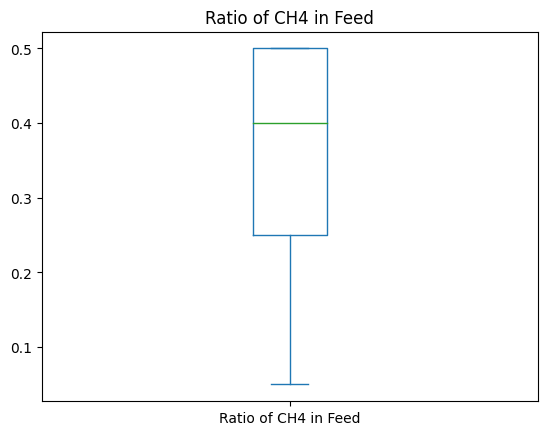

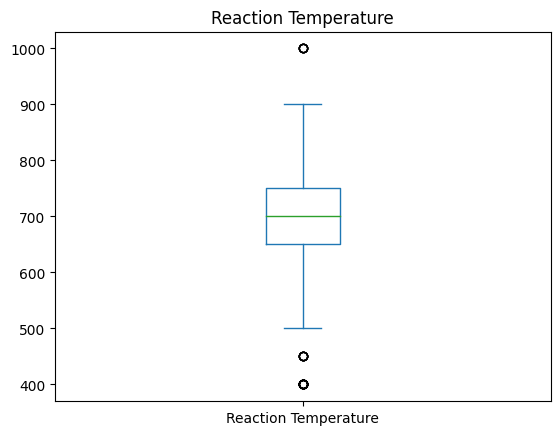

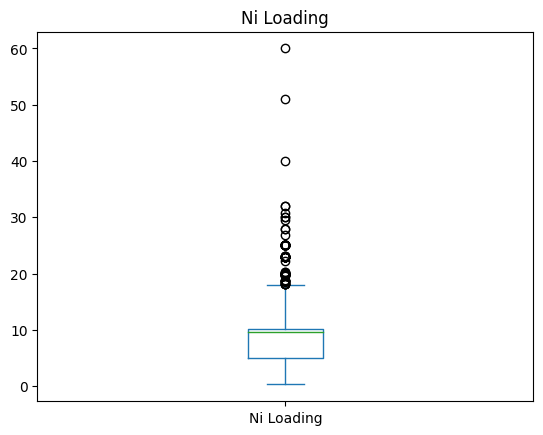

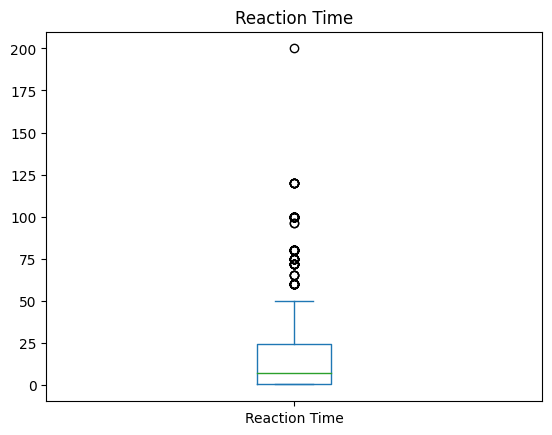

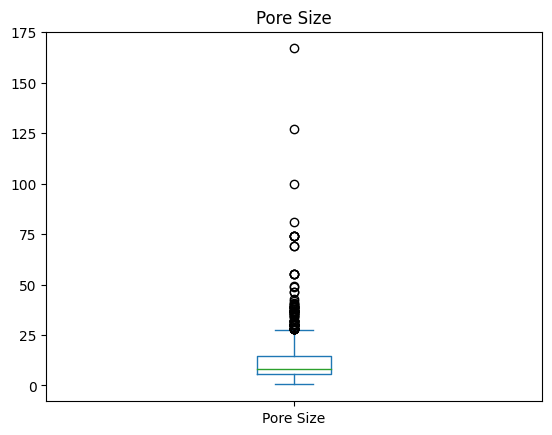

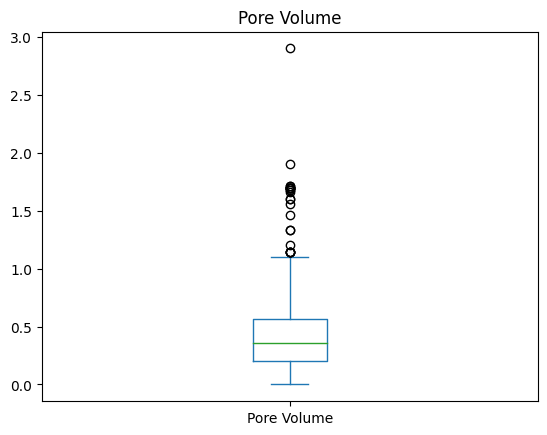

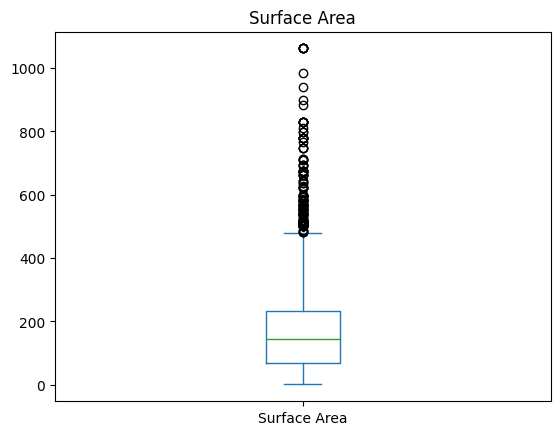

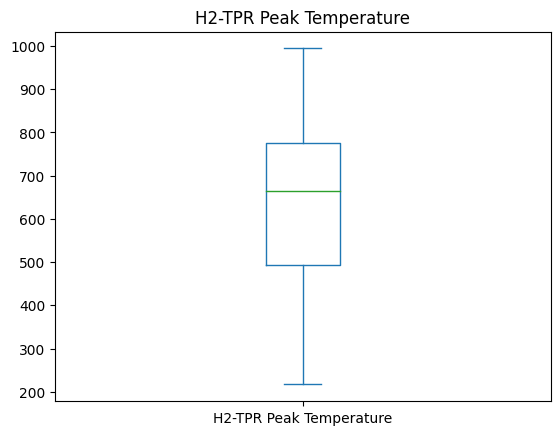

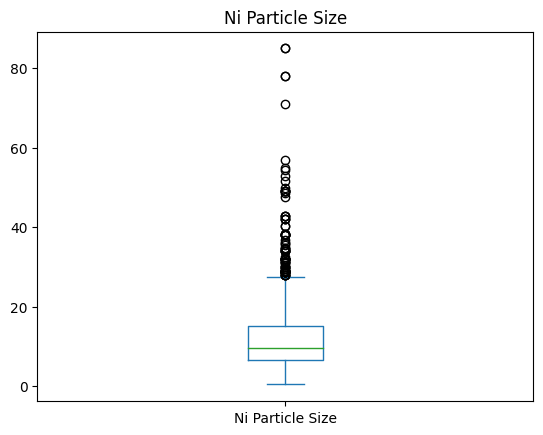

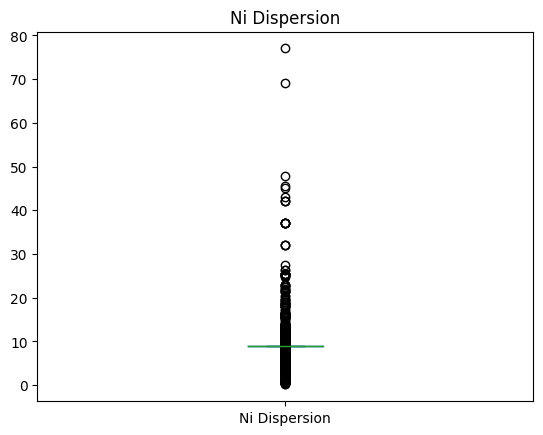

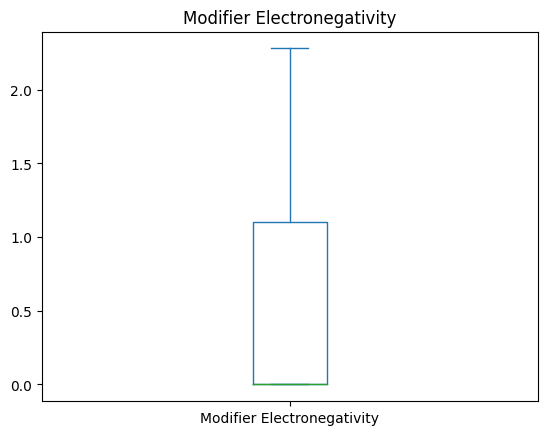

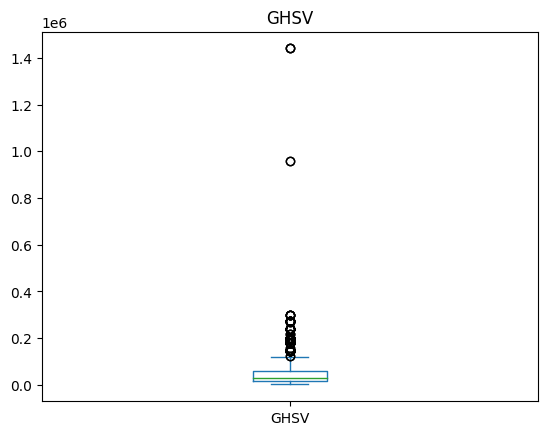

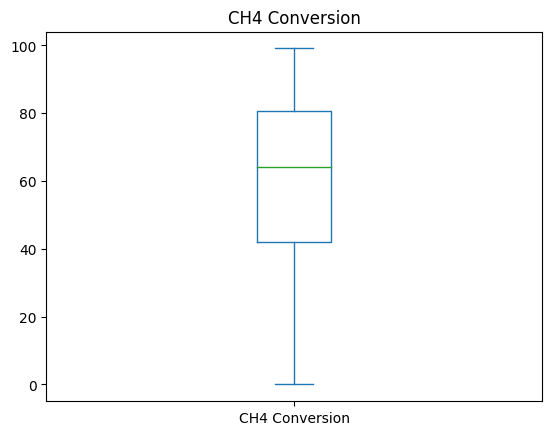

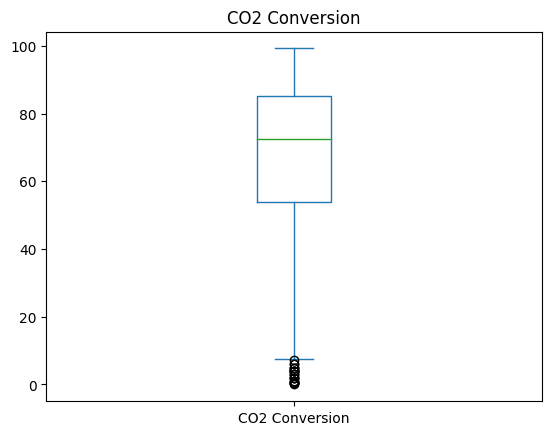

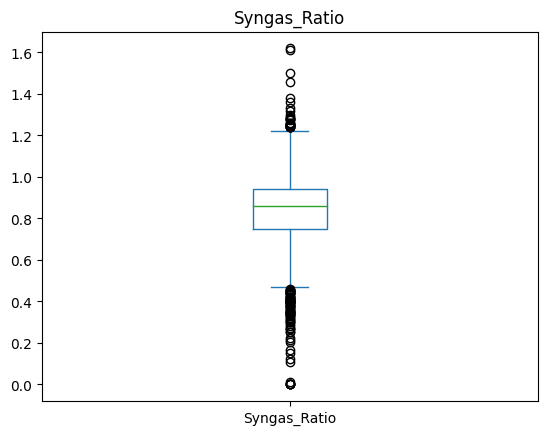

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Visulaize outliers in the dataset

# Filter for numeric columns (integer or float)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create box plots for each numeric column, handling potential NaN values
for col in numeric_columns:
    # Check for NaN values and handle them appropriately
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())  # Replace NaN with column mean (adjust as needed)

    # Create box plot
    df[col].plot(kind='box', title=col)
    plt.show()

In [ ]:
# Create a new data_frame df_clean and delete rows that have outliers

# Filter for numeric columns (integer or float)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

print(type(numeric_columns))

# # Create a new DataFrame to store rows without outliers
# df_clean = df.copy()

# # Iterate through numeric columns and remove outliers
# for col in numeric_columns:
#     # Calculate quartiles and IQR
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     # Remove rows with outliers
#     df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# # Save the cleaned DataFrame to a new XLSX file
# df_clean.to_excel('cleaned_data.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>


Step 4: Summary statistics

In [6]:
import pandas as pd

# Filter for numeric columns (integer or float)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate descriptive statistics
descriptive_stats = numeric_columns.describe()

# Print the results
print(descriptive_stats)

# Calculate IQR
iqr = descriptive_stats.loc['75%'] - descriptive_stats.loc['25%']
print("Interquartile Range (IQR):\n", iqr)

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

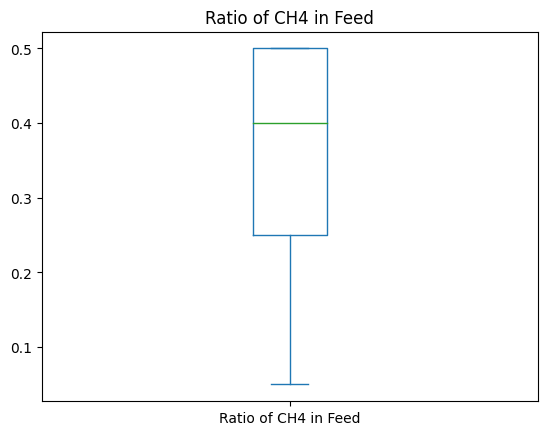

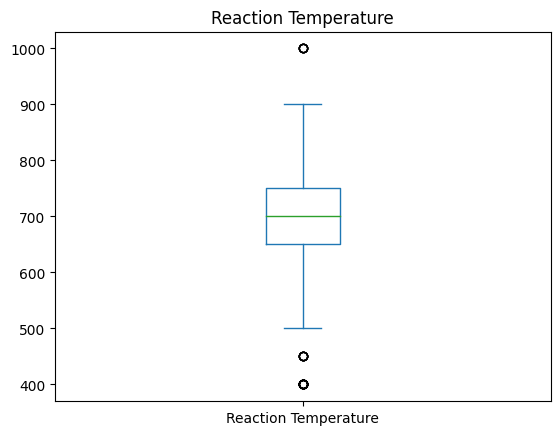

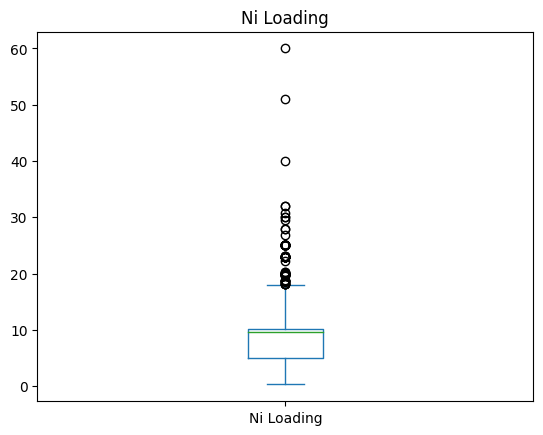

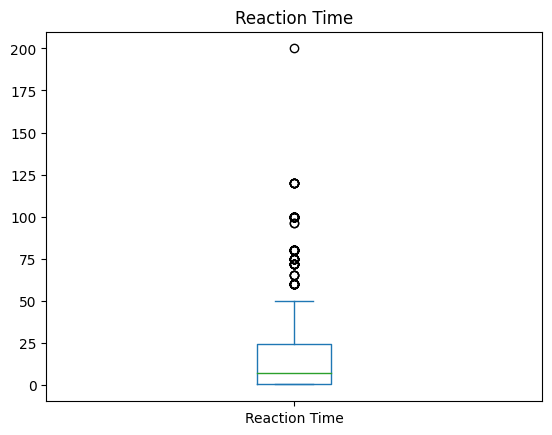

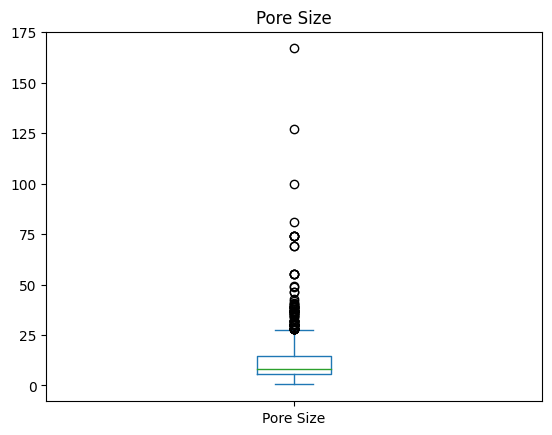

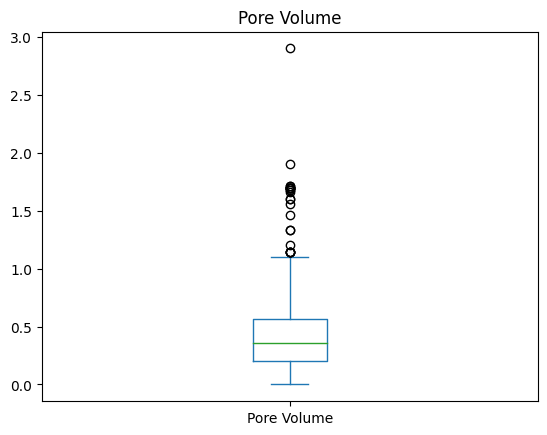

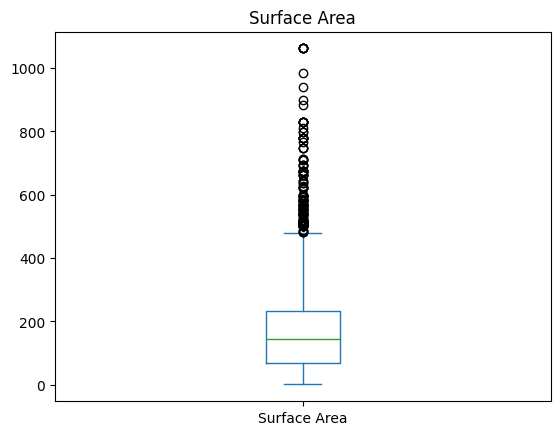

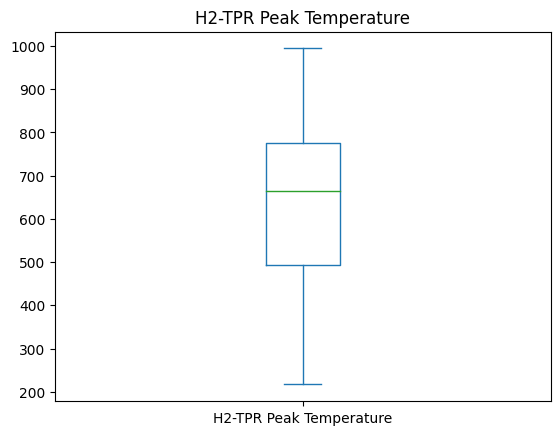

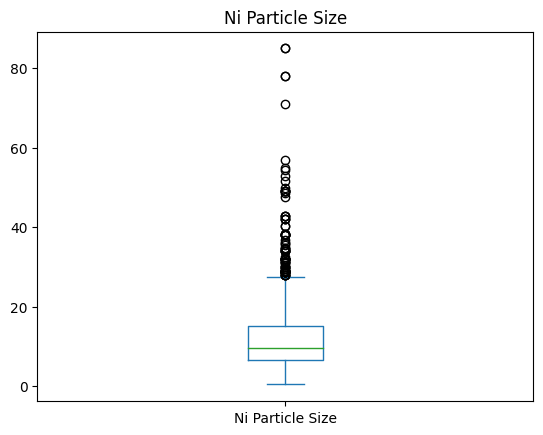

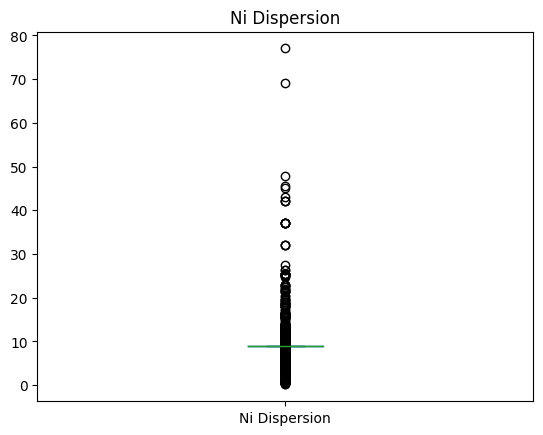

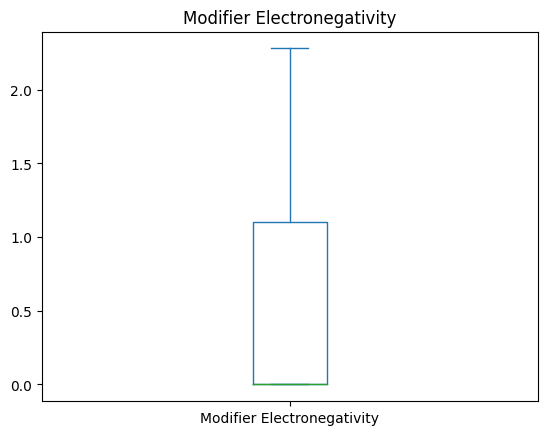

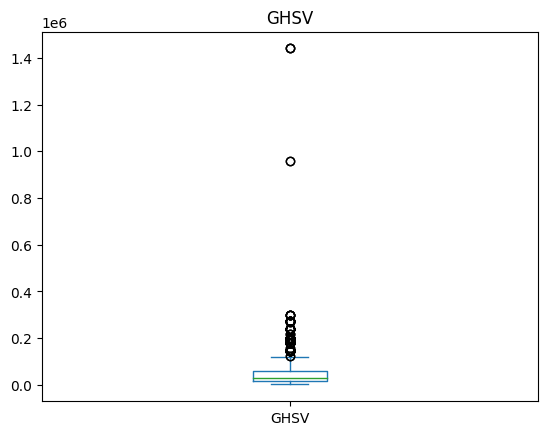

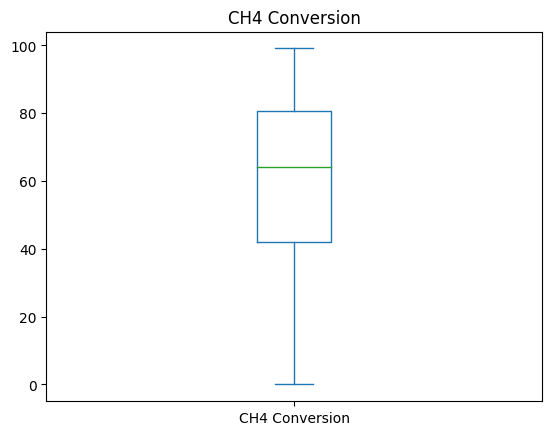

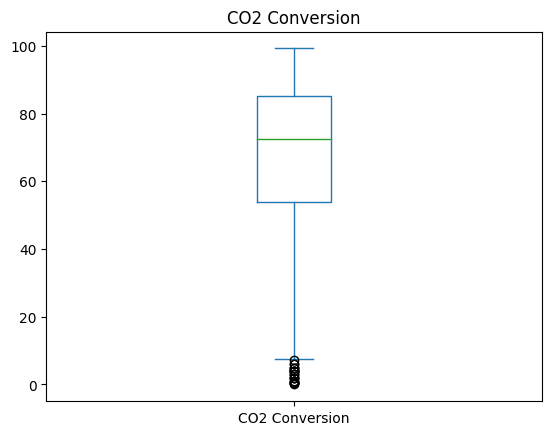

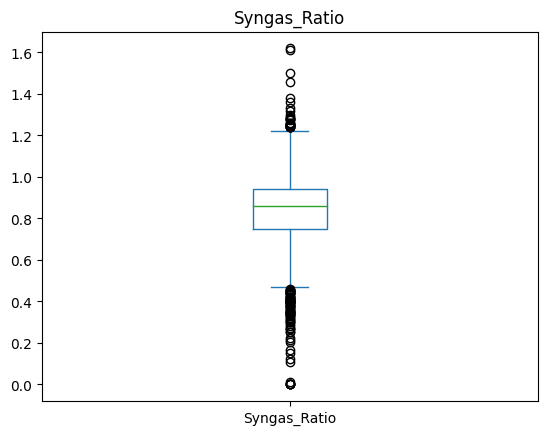

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Visulaize outliers in the dataset

# Filter for numeric columns (integer or float)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create box plots for each numeric column, handling potential NaN values
for col in numeric_columns:
    # Check for NaN values and handle them appropriately
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())  # Replace NaN with column mean (adjust as needed)

    # Create box plot
    df[col].plot(kind='box', title=col)
    plt.show()

I would typicall analyze whether data is skewed or isn't normalized here, but I couldn't figure out how to delete data based on the anme of the column

Step 5: One hot encoding for Caategorical Variables. Note, the new data file is df_encoded.


In [8]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Get the data types of all columns
data_types = df.dtypes

# Identify categorical columns (object type)
categorical_columns = data_types[data_types == 'object'].index.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
print(df_encoded)

      Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
0                     0.15                   650       10.00            0.5   
1                     0.15                   650       10.00            0.5   
2                     0.15                   650       10.00            0.5   
3                     0.15                   650       10.00            0.5   
4                     0.15                   650       10.00            0.5   
...                    ...                   ...         ...            ...   
1709                  0.50                   750        4.24           72.0   
1710                  0.50                   700        5.00            3.0   
1711                  0.50                   700        5.00            3.0   
1712                  0.50                   700        5.00            3.0   
1713                  0.50                   700        5.00            3.0   

      Pore Size  Pore Volume  Surface Area  H2-TPR 

# New Section

Checking for repeat values in data


In [9]:
# check for columns with constant values

import pandas as pd

# Assuming your DataFrame is named 'df'

constant_columns = df_encoded.columns[(df_encoded.nunique() == 1)]
print("Constant columns:", constant_columns)

Constant columns: Index([], dtype='object')


In [10]:
# checks for columns with the same name

duplicate_columns = df_encoded.columns.duplicated()
duplicate_columns_index = df_encoded.columns[df_encoded.columns.duplicated()].tolist()
print("Duplicate columns:", duplicate_columns_index)

Duplicate columns: []


In [11]:
# check for identical values across all rows

identical_columns = []
for col1, col2 in zip(df_encoded.columns[:-1], df_encoded.columns[1:]):
    if (df_encoded[col1] == df_encoded[col2]).all():
        identical_columns.append((col1, col2))
print("Identical columns:", identical_columns)

Identical columns: []


In [12]:
# print identical columns

redundant_columns = set(constant_columns).union(duplicate_columns_index).union([col1 for col1, _ in identical_columns])
print("Redundant columns:", redundant_columns)

Redundant columns: set()


In [13]:
# delete idental columns

df_cleaned = df_encoded.drop(columns=redundant_columns)

NO columns were removed because there were no repeats

Step 7: Correlation and Heatmaps

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Print the correlation matrix
print(correlation_matrix)

                                  Ratio of CH4 in Feed  Reaction Temperature  \
Ratio of CH4 in Feed                          1.000000              0.042877   
Reaction Temperature                          0.042877              1.000000   
Ni Loading                                    0.069500             -0.043081   
Reaction Time                                -0.028092              0.252815   
Pore Size                                    -0.004645             -0.021182   
...                                                ...                   ...   
Catalyst_Y–Ni/SBA-16-MgO                      0.048430             -0.064517   
Catalyst_Zr (10)-Ni(15)/ perlite             -0.051702             -0.001370   
Catalyst_Zr (20)-Ni(15)/perlite,             -0.051702             -0.001370   
Catalyst_ZrO2/10Ni/SBA-15                     0.048430             -0.064517   
Catalyst_–Ni–La2O3                           -0.044860             -0.000968   

                                  Ni Lo

In [ ]:
# # Create a heatmap to visualize the correlations
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# takes too long to show :/

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79fc54390f70> (for post_execute):


KeyboardInterrupt: 

Step 8: Visualizing Data Relationships


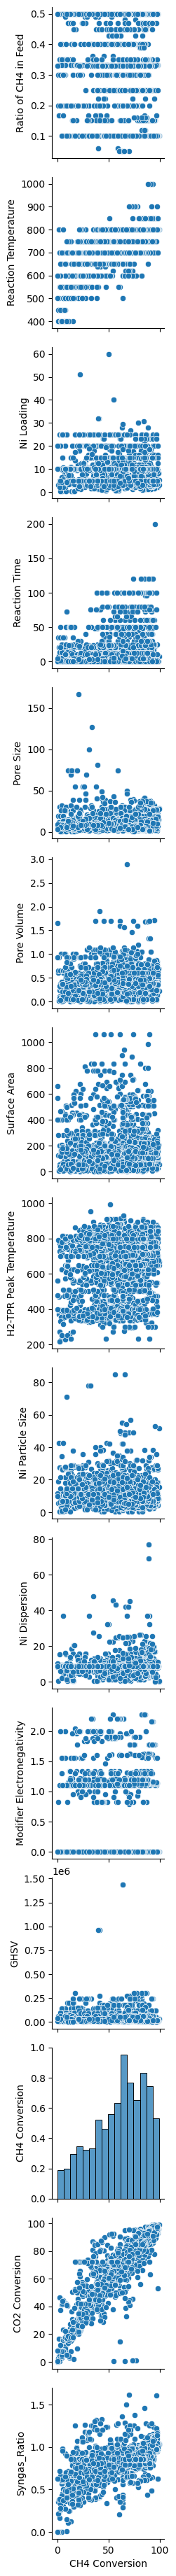

In [16]:
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named 'df'

# Filter for numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Create a pair plot with 'MSP' on the x-axis for all numeric columns
sns.pairplot(df_encoded, x_vars=['CH4 Conversion'], y_vars=numeric_columns)


# plot a pairplot to visualize relationships between all variables
# sns.pairplot(df_encoded)
# plt.title('Pairplot of Dataset')
# plt.show()

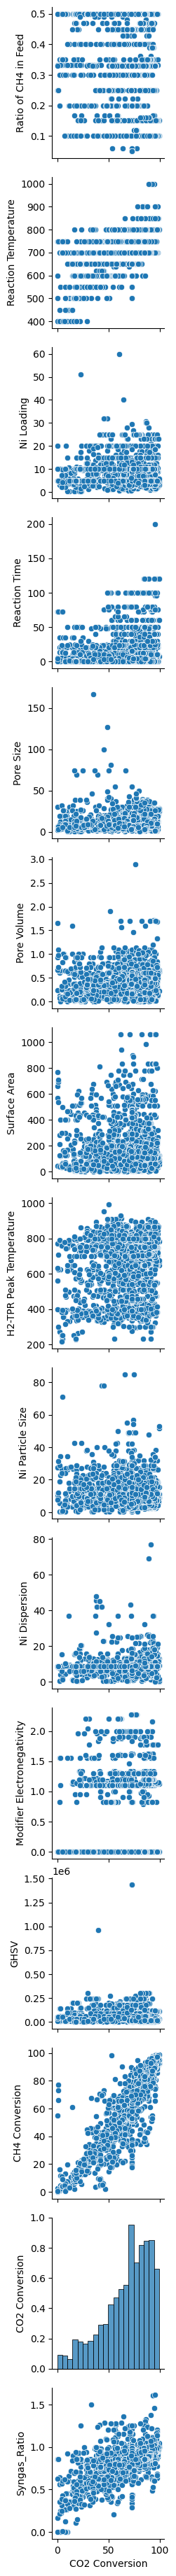

In [17]:
sns.pairplot(df_encoded, x_vars=['CO2 Conversion'], y_vars=numeric_columns)

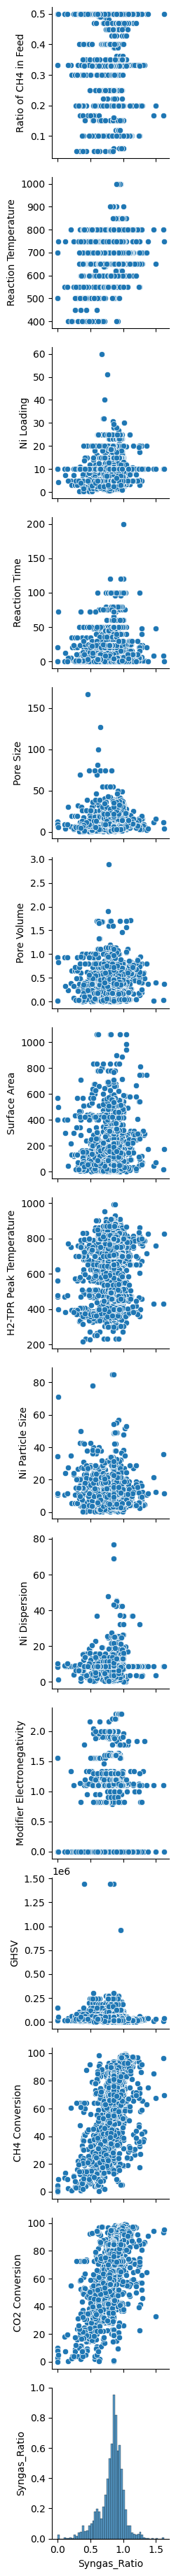

In [18]:
sns.pairplot(df_encoded, x_vars=['Syngas_Ratio'], y_vars=numeric_columns)

Just looking at the heat map, I know that there are no two features taht are highly correlation, so I'm not dropping anything

Step 10: Final Thoughts


To increase the amount of CH4 converted, the reaction temperature should be increased, the reaction time should increase

To increase the amount of CO2 converted, reaction temperature should be increased, reaction time should be increased, the surface area should be low.

To increase the Syngas Ratio, the Ratio of CH4 in the feed should be decreased.
